In [8]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "t-pacheco"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW2"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

✅ Already inside repo folder: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/t-pacheco/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW2


# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 3, 2025**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this study is to determine if the different teaching methods affect student understanding of hypothesis testing controlling for prior knowledge.

**Question 2.** Specify the outcome variable

The outcome variable is test score.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

IV= test score
Blocking factor= prior knowledge

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

Since we have identified a confounding variable (prior knowledge) that will largely impact the test scores, it makes sense to categorize the students by prior knowledge to account for the inherent variation. A completely randomized design would not account for the variation in test scores due to prior knowledge.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null: The average test score is equal for all aging times
$$ H_0: \mu_{\text{Direct Instruction}} = \mu_{\text{Inquiry Based}} = \mu_{\text{Collaborative Learning}} $$

Alternative: At least one pair of group means are not equal.
$$ H_1: \mu_{\text{Direct Instruction}} \neq \mu_{\text{Inquiry Based}} \neq \mu_{\text{Collaborative Learning}}$$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prior_Knowledge  60 non-null     object 
 1   Teaching_Method  60 non-null     object 
 2   Score            60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB
None
                                   mean       std
Prior_Knowledge Teaching_Method                  
High            Collaborative    90.927  7.970758
                Direct           76.998  6.125899
                Inquiry          88.624  5.316835
Low             Collaborative    82.176  8.168793
                Direct           73.659  6.623811
                Inquiry          81.903  5.984395


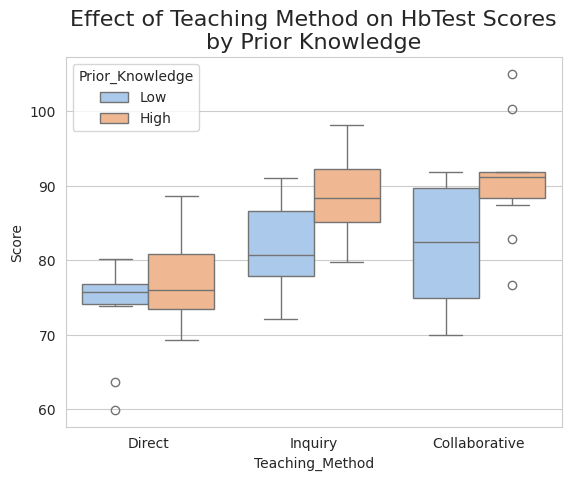

In [14]:
# importing libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# importing data
teaching = pd.read_excel('Data Science Teaching Method.xlsx')
print(teaching.info())

# means and sd by prior knowledge and teaching method
sum_stats = teaching.groupby(['Prior_Knowledge','Teaching_Method'])['Score'].agg(['mean','std'])

print(sum_stats)

# stratified boxplots
# first want to fix order of prior knowledge
pk_order = ["Low","High"]
teaching['Prior_Knowledge'] = pd.Categorical(teaching['Prior_Knowledge'],
                                          categories=pk_order,
                                          ordered=True)
# actually making boxplot
sns.set_style("whitegrid")

sns.boxplot(
    data=teaching,
    x='Teaching_Method',
    y='Score',
    hue='Prior_Knowledge',
    hue_order=pk_order, # Manually set the order of the hue variable
    palette='pastel' # Choose a color palette
)

## Step 3: Add labels and titles ##

plt.title("Effect of Teaching Method on HbTest Scores\nby Prior Knowledge",
          loc='center',
          fontsize=16)

## Show the plot ##

plt.show()

The exploratory data seem to support the alternative hypothesis. The direct teaching method has lower average scores for the students in the low and high prior knoweldge groups.

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

                      sum_sq    df          F    PR(>F)
Teaching_Method  1508.792653   2.0  16.525296  0.000002
Prior_Knowledge   589.756202   1.0  12.918801  0.000687
Residual         2556.456163  56.0        NaN       NaN


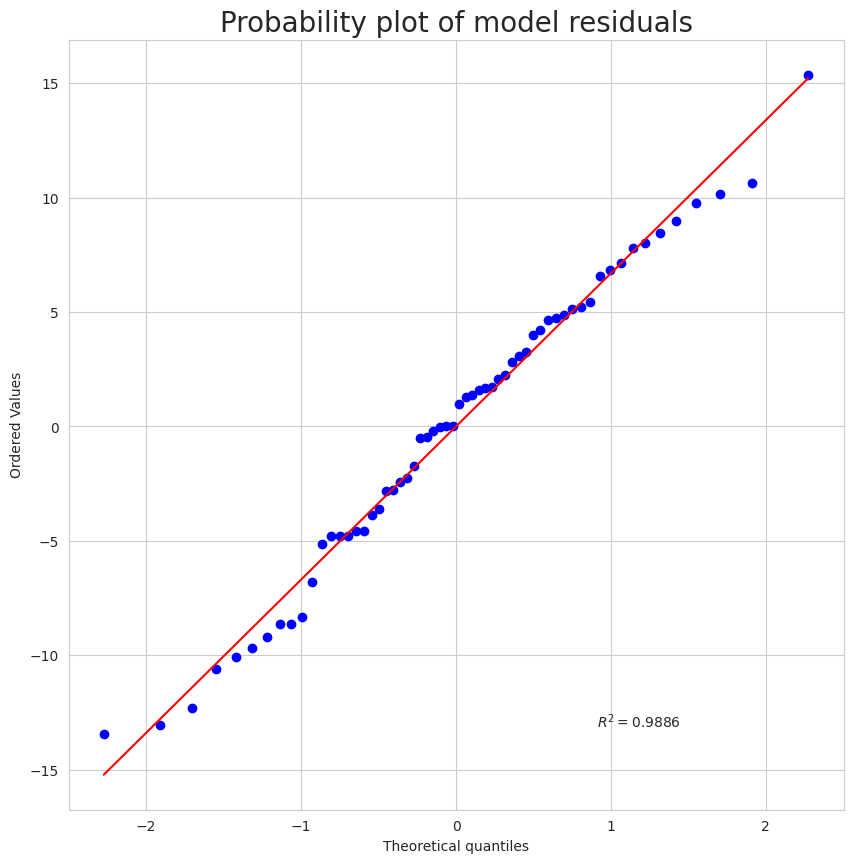

ShapiroResult(statistic=np.float64(0.9844685588485159), pvalue=np.float64(0.6424220730040102))


In [17]:
# fitting anova model
t_model=ols('Score~Teaching_Method+Prior_Knowledge', data=teaching).fit()
print(sm.stats.anova_lm(t_model, typ=2))

# testing normality

import scipy.stats as stats
tmod_resid=t_model.resid

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(tmod_resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residuals", fontsize= 20)
ax.set

plt.show()

# s-w test for nomality
print(stats.shapiro(tmod_resid))

The points on the QQplot fall along the bisecting line with no pattern in deviation and the p-value from the Shapiro-Wilk test also supports that the data does not violate the assumption of normlaity.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

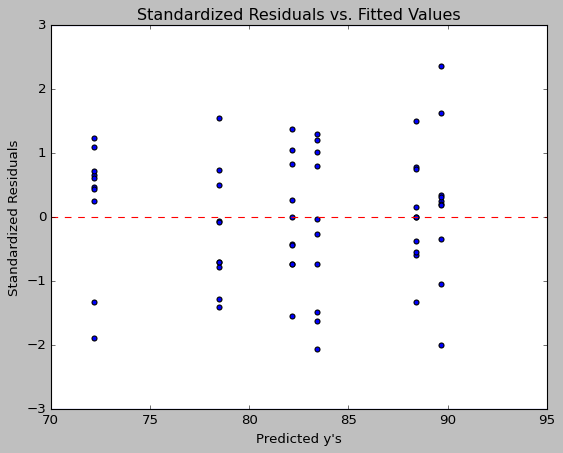

F-statistic: 1.363690732818881
F p-value: 0.2632703901501646


In [21]:
# testing for homogeneity
standard_resid=t_model.get_influence().resid_studentized_internal
fitted_vals=t_model.fittedvalues

# plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, standard_resid)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

# b-p test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(tmod_resid, t_model.model.exog)

f_stat = bp_test[2]
f_p_val = bp_test[3]

print(f"F-statistic: {f_stat}")
print(f"F p-value: {f_p_val}")

The standardized residuals are randomly scattered around 0, with similar spread suggesting the data has constant variance. The resulting p value from the b-p test also supports the null hypothesis that the assumption of constant variance/homogeneity is met.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

In [23]:
print(sm.stats.anova_lm(t_model,typ=2))

                      sum_sq    df          F    PR(>F)
Teaching_Method  1508.792653   2.0  16.525296  0.000002
Prior_Knowledge   589.756202   1.0  12.918801  0.000687
Residual         2556.456163  56.0        NaN       NaN


Since the F statistic is 16.5 with a corresponding p-value of p<0.001, the data more strongly supports the alternative hypothesis that at least one pair of group means differs from the others.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

In [24]:
# tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(endog=teaching['Score'], groups=teaching['Teaching_Method'],
                                  alpha=0.05)
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -11.223    0.0 -16.8766 -5.5694   True
Collaborative Inquiry   -1.288 0.8478  -6.9416  4.3656  False
       Direct Inquiry    9.935 0.0003   4.2814 15.5886   True
-------------------------------------------------------------


**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

The p-values for collaborative and direct as well as direct and inquiry are less than 0.05, suggesting that the direct group means are significantly different to the other groups. The collaborative and inquiry teaching methods had higher group means for test score than the direct method across both levels of prior knowledge.

A limitation of this study is that there was no prior testing done to compare the knowledge gained from each teaching method. Also, the way that high and low prior knowledge was decided is not clear and could potentially be self reported which could introduce self-reporting bias.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine how online learning platforms effect student engagement while controlling for class time and day.

**Question 2.** Specify the outcome

The outcome is student engagement

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

IV= online learning platforms
BFs= day of the week, time of day

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

Since there are multiple confounding variables (day of week, time of day) with four levels which matches the number of levels in our IV, a latin square design best fits this experiment. A completely randomized desing does not account for the confounding variables and a randomized block design would only be able to account for one blocking factor.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null: The average student engagement is equal for all online learning platforms
$$ H_0: \mu_{\text{A}} = \mu_{\text{B}} = \mu_{\text{C}} = \mu_{\text{D}} $$

Alternative: At least one pair of group means are not equal.
$$ H_A: \mu_{\text{A}} \neq \mu_{\text{B}} \neq \mu_{\text{C}} \neq \mu_{\text{D}} $$


**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         16 non-null     object 
 1   Section     16 non-null     object 
 2   Platform    16 non-null     object 
 3   Engagement  16 non-null     float64
dtypes: float64(1), object(3)
memory usage: 644.0+ bytes
None
               mean        std
Platform                      
A         1377.7675  16.339232
B         1331.2625  28.513652
C         1303.8225  21.022768
D         1369.8225  13.753119


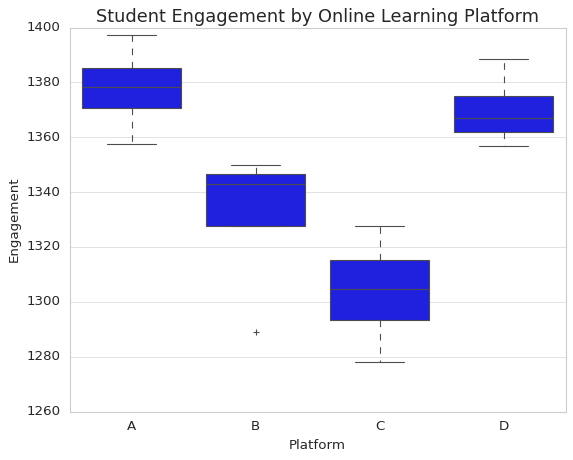

In [28]:

# importing data
learn = pd.read_excel('Online Learning and Engagement.xlsx')
print(learn.info())

# means and sd by online platform
sum_stats = learn.groupby(['Platform'])['Engagement'].agg(['mean','std'])

print(sum_stats)

# boxplot

sns.set_style("whitegrid")

sns.boxplot(
    data=learn,
    x='Platform',
    y='Engagement'
)

plt.title("Student Engagement by Online Learning Platform",
          loc='center',
          fontsize=16)

plt.show()


These results support the alternative hypothesis more strongly. Platforms A and B had similar mean engagements while B and C had quite lower mean engagments.

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


                sum_sq   df            F        PR(>F)
Platform  2.163185e+06  3.0  1639.526583  1.229404e-12
Day       1.175124e+03  3.0     0.890653  4.823487e-01
Section   2.434522e+06  3.0  1845.179206  7.230832e-13
Residual  3.958188e+03  9.0          NaN           NaN


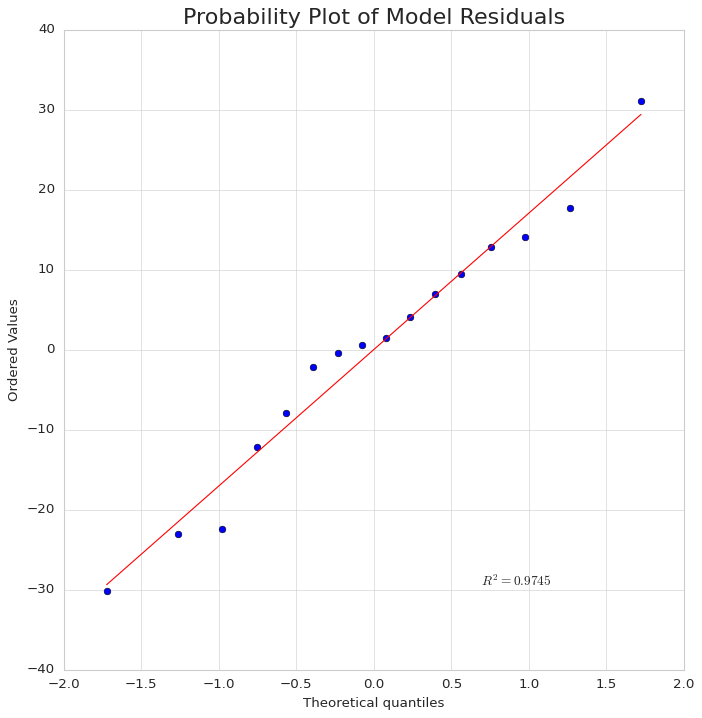

ShapiroResult(statistic=np.float64(0.9751694518478372), pvalue=np.float64(0.9137785828125332))


In [31]:
# fitting anova model
learn_mod = ols('Engagement~Platform+Day+Section', data=learn).fit()
print(sm.stats.anova_lm(learn_mod, typ=2))

# testing normality
residuals = learn_mod.resid

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot=plt, rvalue=True)
ax.set_title("Probability Plot of Model Residuals", fontsize=20)
ax.set

plt.show()

# s-w test
print(stats.shapiro(residuals))

The points fall pretty closely to the bisecting line on the QQ plot and the p-value for the S-W test is 0.9 which suggests that the data meets the assumption of normality.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?


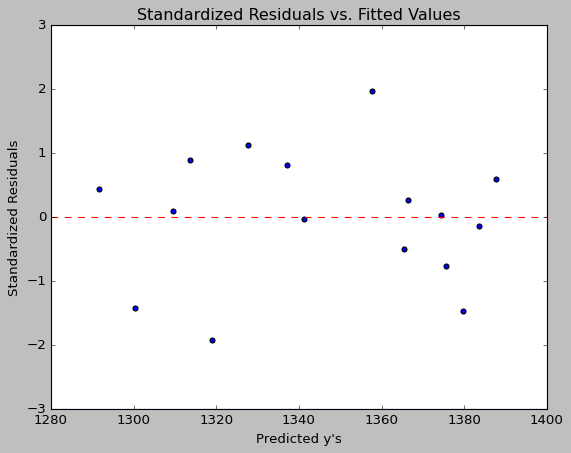

F-statistic: 1.3365159144762975
F p-value: 0.33369298180029866


In [36]:
# testing for homogeneity
standard_resid=learn_mod.get_influence().resid_studentized_internal
fitted_vals=learn_mod.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, standard_resid)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

# b-p test
bp_test = het_breuschpagan(residuals, learn_mod.model.exog)

f_stat = bp_test[2]
f_p_val = bp_test[3]
print(f"F-statistic: {f_stat}")
print(f"F p-value: {f_p_val}")

The points are randomly scattered around the 0 with similar spread of standardized residuals suggesting constant variance. The p-value from the b-p test (0.33) support the null hypotheis of constant variance.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

In [37]:
print(sm.stats.anova_lm(learn_mod,typ=2))

                sum_sq   df            F        PR(>F)
Platform  2.163185e+06  3.0  1639.526583  1.229404e-12
Day       1.175124e+03  3.0     0.890653  4.823487e-01
Section   2.434522e+06  3.0  1845.179206  7.230832e-13
Residual  3.958188e+03  9.0          NaN           NaN


The f-statistic for platform is 1639.5 with a corresponding p-value of <0.001. This supports the alternative hypothesis that at least two of the online platforms may have meaningful differing mean student engagement.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

In [38]:
# tukey test
tukey_results = pairwise_tukeyhsd(endog=learn['Engagement'], groups=learn['Platform'],
                                  alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -46.505 0.0347  -89.9249  -3.0851   True
     A      C  -73.945 0.0014 -117.3649 -30.5251   True
     A      D   -7.945 0.9466  -51.3649  35.4749  False
     B      C   -27.44 0.2879  -70.8599  15.9799  False
     B      D    38.56 0.0881   -4.8599  81.9799  False
     C      D     66.0 0.0034   22.5801 109.4199   True
-------------------------------------------------------


**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations of this experiment.

Learning platform A had significantly different mean engagement from platforms B and C an platfomr C had significantly different mean engagement from platform D. As seen in the boxplots, platform A had the highest mean engagement, with D as a close second, while B and C performed similarly with lower mean engagement. This suggests that the school should implement learning platforms A or D in order to maximaize student engagement in online courses controlling for course time and day.